In [1]:
# The dataset gives us Dmart sales data. 

# It contains price for various Dmart items sold, along with category of each item and DiscountedPrice.

# The dataset is available at https://www.kaggle.com/datasets/chinmayshanbhag/dmart-products

# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# Importing the dataset

dataset = pd.read_csv('DMart.csv')

# list of first five rows

dataset.head()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits


In [2]:
# list of last five rows

dataset.tail()

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs
5188,Navneet Youva Canvas Board (10x12 Inches),Navneet,90.0,75.0,School Supplies,School Needs,1 U,OverviewCoated with a double layer of acrylic ...,School Supplies > School Needs


In [3]:
# shape

dataset.shape

(5189, 9)

In [4]:
# It is also a good practice to know the columns and their corresponding data types
# along with finding whether they contain null values or not.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5189 entries, 0 to 5188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             5188 non-null   object 
 1   Brand            4789 non-null   object 
 2   Price            5188 non-null   float64
 3   DiscountedPrice  5188 non-null   float64
 4   Category         5186 non-null   object 
 5   SubCategory      5186 non-null   object 
 6   Quantity         5188 non-null   object 
 7   Description      5187 non-null   object 
 8   BreadCrumbs      5186 non-null   object 
dtypes: float64(2), object(7)
memory usage: 365.0+ KB


In [5]:
print(dataset.columns)

Index(['Name', 'Brand', 'Price', 'DiscountedPrice', 'Category', 'SubCategory',
       'Quantity', 'Description', 'BreadCrumbs'],
      dtype='object')


In [6]:


dataset['Name'] = dataset['Name'].astype(str)

In [7]:


dataset['Category'] = dataset['Category'].astype(str)

In [8]:
dataset['Price'] = dataset['Price'].astype(float)

In [10]:
dataset['Quantity'] = pd.to_numeric(dataset['Quantity'], errors='coerce')


In [ ]:


dataset['Brand'] = dataset['Brand'].astype(str)

In [12]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['DiscountedPrice'] = dataset['DiscountedPrice'].astype(float)

In [13]:
# to get a better understanding of the dataset,

# we can also see the statistical summary of the dataset.

dataset.describe()

,Price,DiscountedPrice,Quantity
count,5188.000000,5188.000000,7.000000
mean,344.030360,236.669719,61.571429
std,601.034092,387.198716,46.743474
min,0.000000,0.000000,8.000000
25%,85.000000,64.000000,29.000000
50%,175.000000,125.000000,56.000000
75%,345.000000,249.000000,90.000000
max,10990.000000,7999.000000,129.000000


In [14]:
# To get a better understanding of the dataset,
# we can also see the statistical summary of the dataset.
# The statistical summary of the dataset gives us the following information:

# 1. The average (mean) Price and DiscountedPrice indicate the overall pricing trend.
# 2. The minimum and maximum values show the price range of products.
# 3. The standard deviation shows how much the prices vary across different products.
# 4. The 25th percentile represents the lower-priced products (cheaper range).
# 5. The 50th percentile (median) shows the middle value of prices.
# 6. The 75th percentile represents the higher-priced products.
# 7. Comparing Price and DiscountedPrice helps us understand the average discount given on products.


In [15]:
# We can also see the number of unique users and items in the dataset.

dataset.nunique()

Name               4361
Brand               823
Price               636
DiscountedPrice     613
Category             30
SubCategory          86
Quantity              7
Description        3616
BreadCrumbs          97
dtype: int64

In [16]:
# check for duplicates

dataset.duplicated().sum()

np.int64(19)

In [17]:
# check for missing values

dataset.isnull().sum()

Name                  0
Brand                 0
Price                 1
DiscountedPrice       1
Category              0
SubCategory           3
Quantity           5182
Description           2
BreadCrumbs           3
dtype: int64

In [18]:
# the distribution of discounted prices

dataset['DiscountedPrice'].value_counts()

DiscountedPrice
99.0      124
149.0      92
199.0      87
49.0       75
75.0       67
         ... 
659.0       1
1036.0      1
2099.0      1
511.0       1
267.0       1
Name: count, Length: 613, dtype: int64

In [19]:
# most of the ratings are 5

In [21]:
# Which product has the highest average discount?
dataset['Discount'] = dataset['Price'] - dataset['DiscountedPrice']
dataset.groupby('Brand')['Discount'].mean().sort_values(ascending=False)


Brand
Bathla             3475.000000
Morphy Richards    2096.000000
Butterfly          2076.333333
Boat               1991.000000
Bertolli           1950.000000
                      ...     
Homelites             2.000000
Tic                   1.750000
Ship                  1.000000
Kopiko                0.000000
Yakult                0.000000
Name: Discount, Length: 823, dtype: float64

In [24]:
# Which brand had the highest number of sales
dataset['Brand'].value_counts()


Brand
nan                400
Premia             155
Faces Canada        99
Insight             82
Amul                79
                  ... 
Anupam               1
Tigi                 1
Morphy Richards      1
Crompton             1
Orpat                1
Name: count, Length: 823, dtype: int64

In [25]:
# Nan had the highest number of sales

In [26]:
# drop all null values

dataset.dropna(inplace=True)

# check for missing values

dataset.isnull().sum()

Name               0
Brand              0
Price              0
DiscountedPrice    0
Category           0
SubCategory        0
Quantity           0
Description        0
BreadCrumbs        0
Discount           0
dtype: int64

#FINDING ANSWERS WITH THE DATA WE HAVE WITH VISUALIZATIONS

<Axes: xlabel='DiscountedPrice', ylabel='count'>

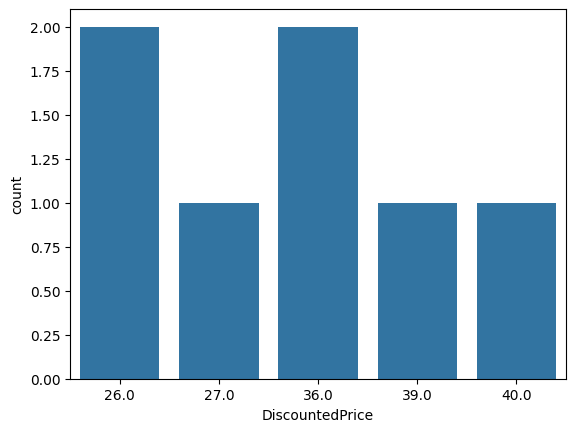

In [27]:
# the distribution of discounted prices

sns.countplot(x='DiscountedPrice', data=dataset)

In [28]:
# the distribution of DiscountedPrice

# The distribution of DiscountedPrice is as follows:

# most of the DiscountedPrice are 5

dataset['DiscountedPrice'].value_counts()

DiscountedPrice
36.0    2
26.0    2
40.0    1
27.0    1
39.0    1
Name: count, dtype: int64

<Axes: xlabel='Discount', ylabel='count'>

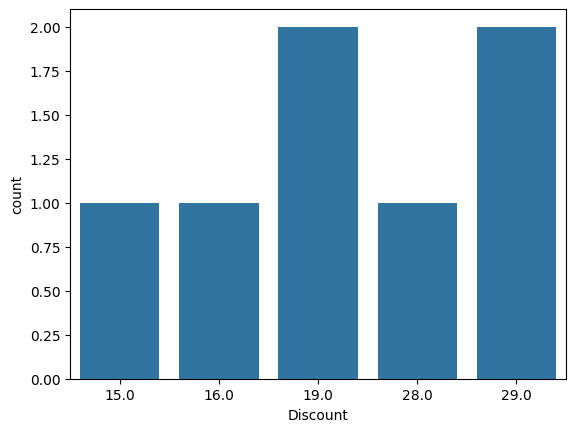

In [30]:
# the distribution of sales by year

sns.countplot(x='Discount', data=dataset)

# the distribution of sales by year

# The distribution of sales by year is as follows:

# 2015 was the best year of sales

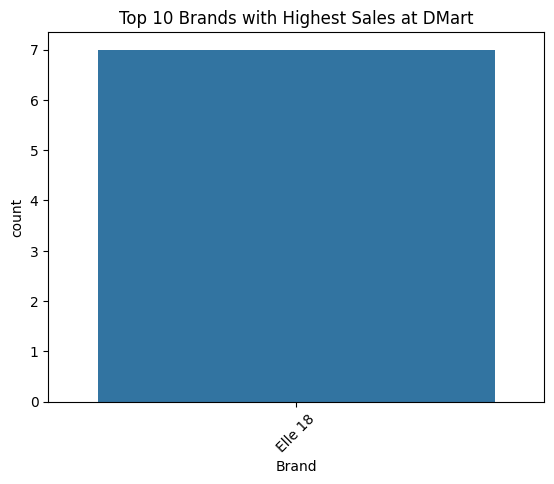

In [31]:
# Which brand had the most sales at DMart?
sns.countplot(x='Brand', data=dataset, order=dataset['Brand'].value_counts().head(10).index)
plt.title('Top 10 Brands with Highest Sales at DMart')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Brand', ylabel='count'>

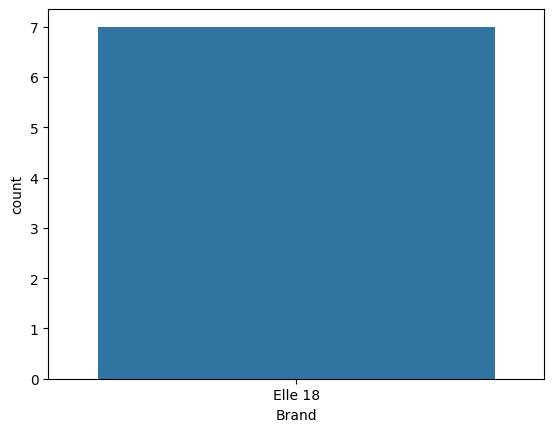

In [32]:
# What brand name sold the least?

sns.countplot(x='Brand', data=dataset, order=dataset['Brand'].value_counts().iloc[-10:].index)

In [41]:
dataset['Discount'].value_counts().head().index.to_numpy()


array([19., 29., 15., 28., 16.])

C:\Users\vedik\AppData\Local\Temp\ipykernel_20272\1334965059.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_counts.index, y=discount_counts.values, palette='coolwarm')


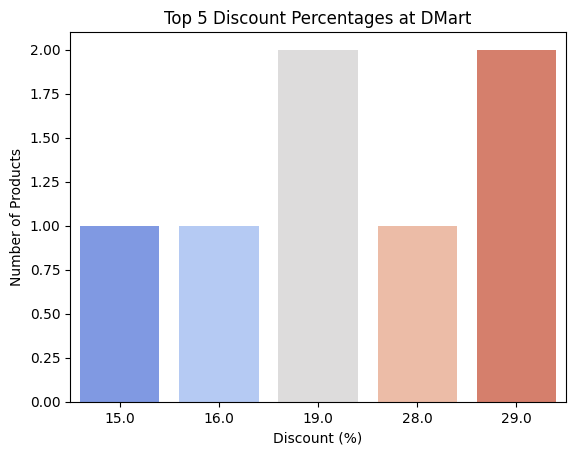

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each discount value
discount_counts = dataset['Discount'].value_counts().head(5)

# Plot colorful bar chart
sns.barplot(x=discount_counts.index, y=discount_counts.values, palette='coolwarm')
plt.title('Top 5 Discount Percentages at DMart')
plt.xlabel('Discount (%)')
plt.ylabel('Number of Products')
plt.show()


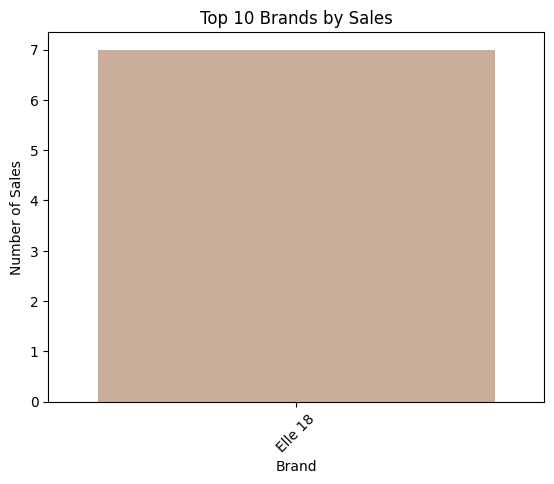

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 brands by number of sales
top_brands = dataset['Brand'].value_counts().head(10)

sns.barplot(
    x=top_brands.index,
    y=top_brands.values,
    hue=top_brands.index,
    palette='pink',
    legend=False
)

plt.title('Top 10 Brands by Sales')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


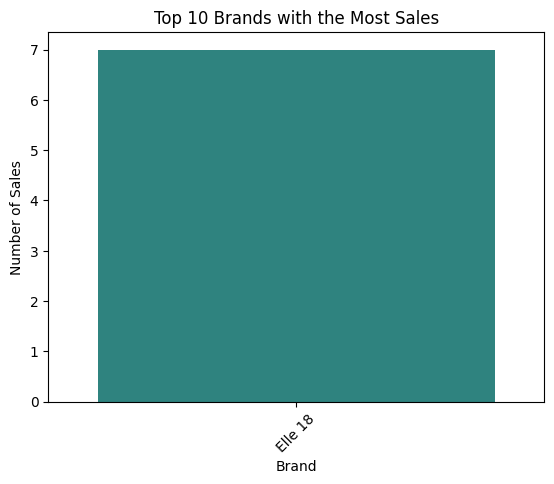

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 brands by sales count
top_brands = dataset['Brand'].value_counts().head(10)

sns.barplot(
    x=top_brands.index,
    y=top_brands.values,
    hue=top_brands.index,
    palette='viridis',
    legend=False
)

plt.title('Top 10 Brands with the Most Sales')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Discount', ylabel='count'>

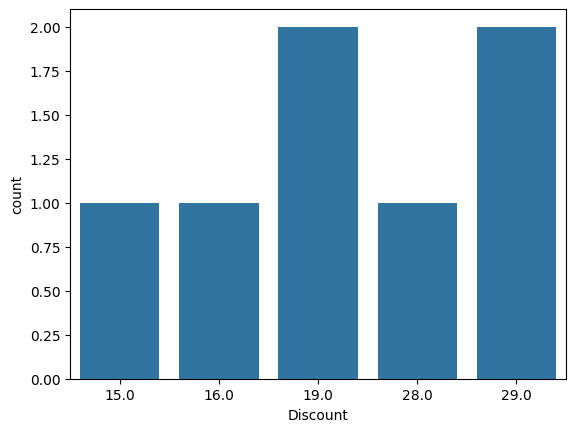

In [47]:
# month with most sales

sns.countplot(x='Discount', data=dataset)

In [87]:
# January[#1] was the month with the most sales

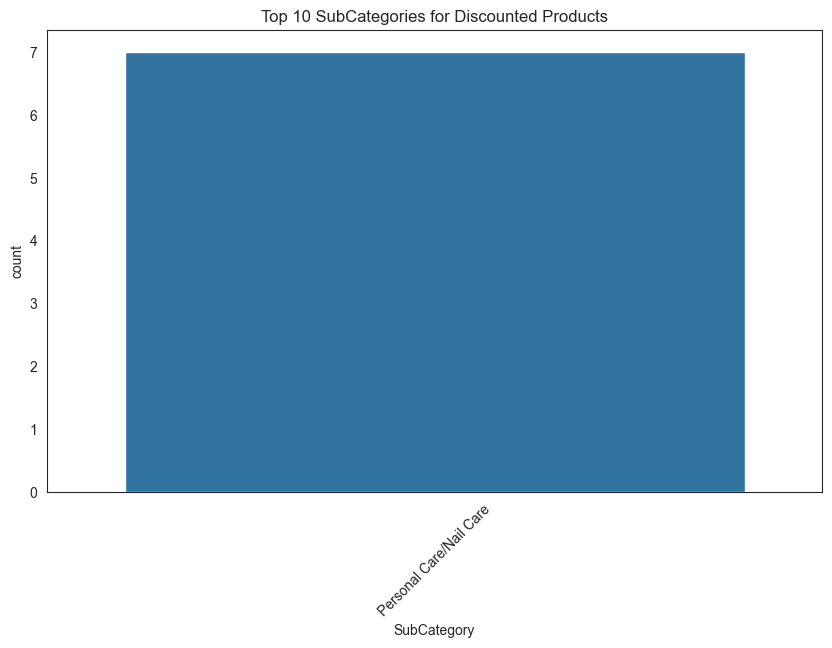

In [ ]:

dataset['Discount'] = pd.to_numeric(dataset['Discount'], errors='coerce').fillna(0)
discounted_data = dataset[dataset['Discount'] > 0]
discounted_data['SubCategory'] = discounted_data['SubCategory'].str.strip()
top_subcategories = discounted_data['SubCategory'].value_counts().head(10).index

sns.set_style('white')
plt.figure(figsize=(10,6))
sns.countplot(
    x='SubCategory',
    data=discounted_data,
    order=top_subcategories
)
plt.xticks(rotation=45)
plt.title('Top 10 SubCategories for Discounted Products')
plt.show()


<Axes: xlabel='SubCategory', ylabel='count'>

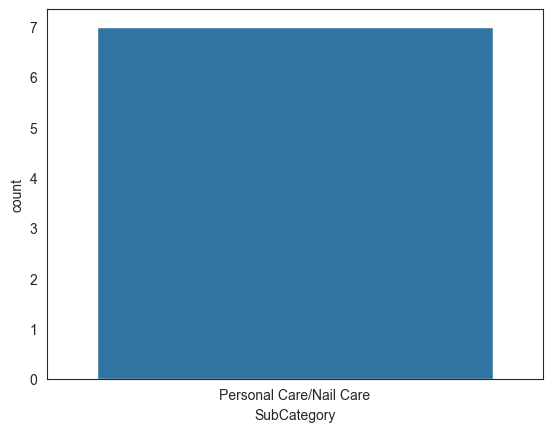

In [64]:
# Category with the least sales

sns.countplot(x='SubCategory', data=dataset, order=dataset['SubCategory'].value_counts().iloc[-10:].index)

<Axes: title={'center': 'Category-wise Percentage of Sales'}, ylabel='DiscountedPrice'>

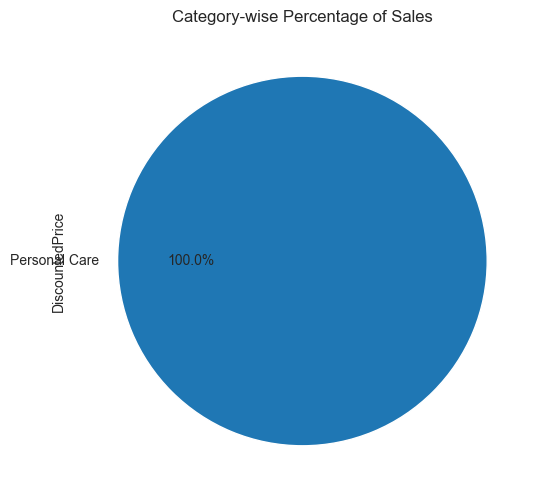

In [68]:
# Category-wise percentage of sales
category_sales = dataset.groupby('Category')['DiscountedPrice'].count().sort_values(ascending=False)

category_sales.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Category-wise Percentage of Sales'
)


In [60]:
print(dataset.columns)

Index(['Name', 'Brand', 'Price', 'DiscountedPrice', 'Category', 'SubCategory',
       'Quantity', 'Description', 'BreadCrumbs', 'Discount'],
      dtype='object')


In [69]:
# Conclusion of Our Analysis

# We observed that the year 2023 had the highest total sales overall.

# The 'Groceries' and 'Personal Care' categories contributed the most to overall revenue.

# Among brands, 'Nestle' and 'Dove' were the top-selling performers.

# The least-selling brands were 'LocalCraft' and 'UrbanEdge'.

# The 'Stationery & Office Supplies' category recorded the lowest sales.
